In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spotify-2023.csv', encoding='latin-1')

In [3]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
print("Column names:")
for col in df.columns:
    print(col)

Column names:
track_name
artist(s)_name
artist_count
released_year
released_month
released_day
in_spotify_playlists
in_spotify_charts
streams
in_apple_playlists
in_apple_charts
in_deezer_playlists
in_deezer_charts
in_shazam_charts
bpm
key
mode
danceability_%
valence_%
energy_%
acousticness_%
instrumentalness_%
liveness_%
speechiness_%


In [5]:
print("Dataset size:", df.shape, " = ", df.size)

Dataset size: (953, 24)  =  22872


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [8]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [9]:
df.dropna(axis = 0, inplace = True)
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [10]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [11]:
LE = LabelEncoder()
df_le = df.copy()
df_le = df_le.drop(['track_name', 'artist(s)_name'], axis=1)
df_le['key'] = LE.fit_transform(df_le['key'])
df_le['mode'] = LE.fit_transform(df_le['mode'])
df_le['streams'] = LE.fit_transform(df_le['streams'])
df_le['in_deezer_playlists'] = LE.fit_transform(df_le['in_deezer_playlists'])
df_le['in_shazam_charts'] = LE.fit_transform(df_le['in_shazam_charts'])
df_le.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          817 non-null    int64
 1   released_year         817 non-null    int64
 2   released_month        817 non-null    int64
 3   released_day          817 non-null    int64
 4   in_spotify_playlists  817 non-null    int64
 5   in_spotify_charts     817 non-null    int64
 6   streams               817 non-null    int32
 7   in_apple_playlists    817 non-null    int64
 8   in_apple_charts       817 non-null    int64
 9   in_deezer_playlists   817 non-null    int32
 10  in_deezer_charts      817 non-null    int64
 11  in_shazam_charts      817 non-null    int32
 12  bpm                   817 non-null    int64
 13  key                   817 non-null    int32
 14  mode                  817 non-null    int32
 15  danceability_%        817 non-null    int64
 16  valence_%    

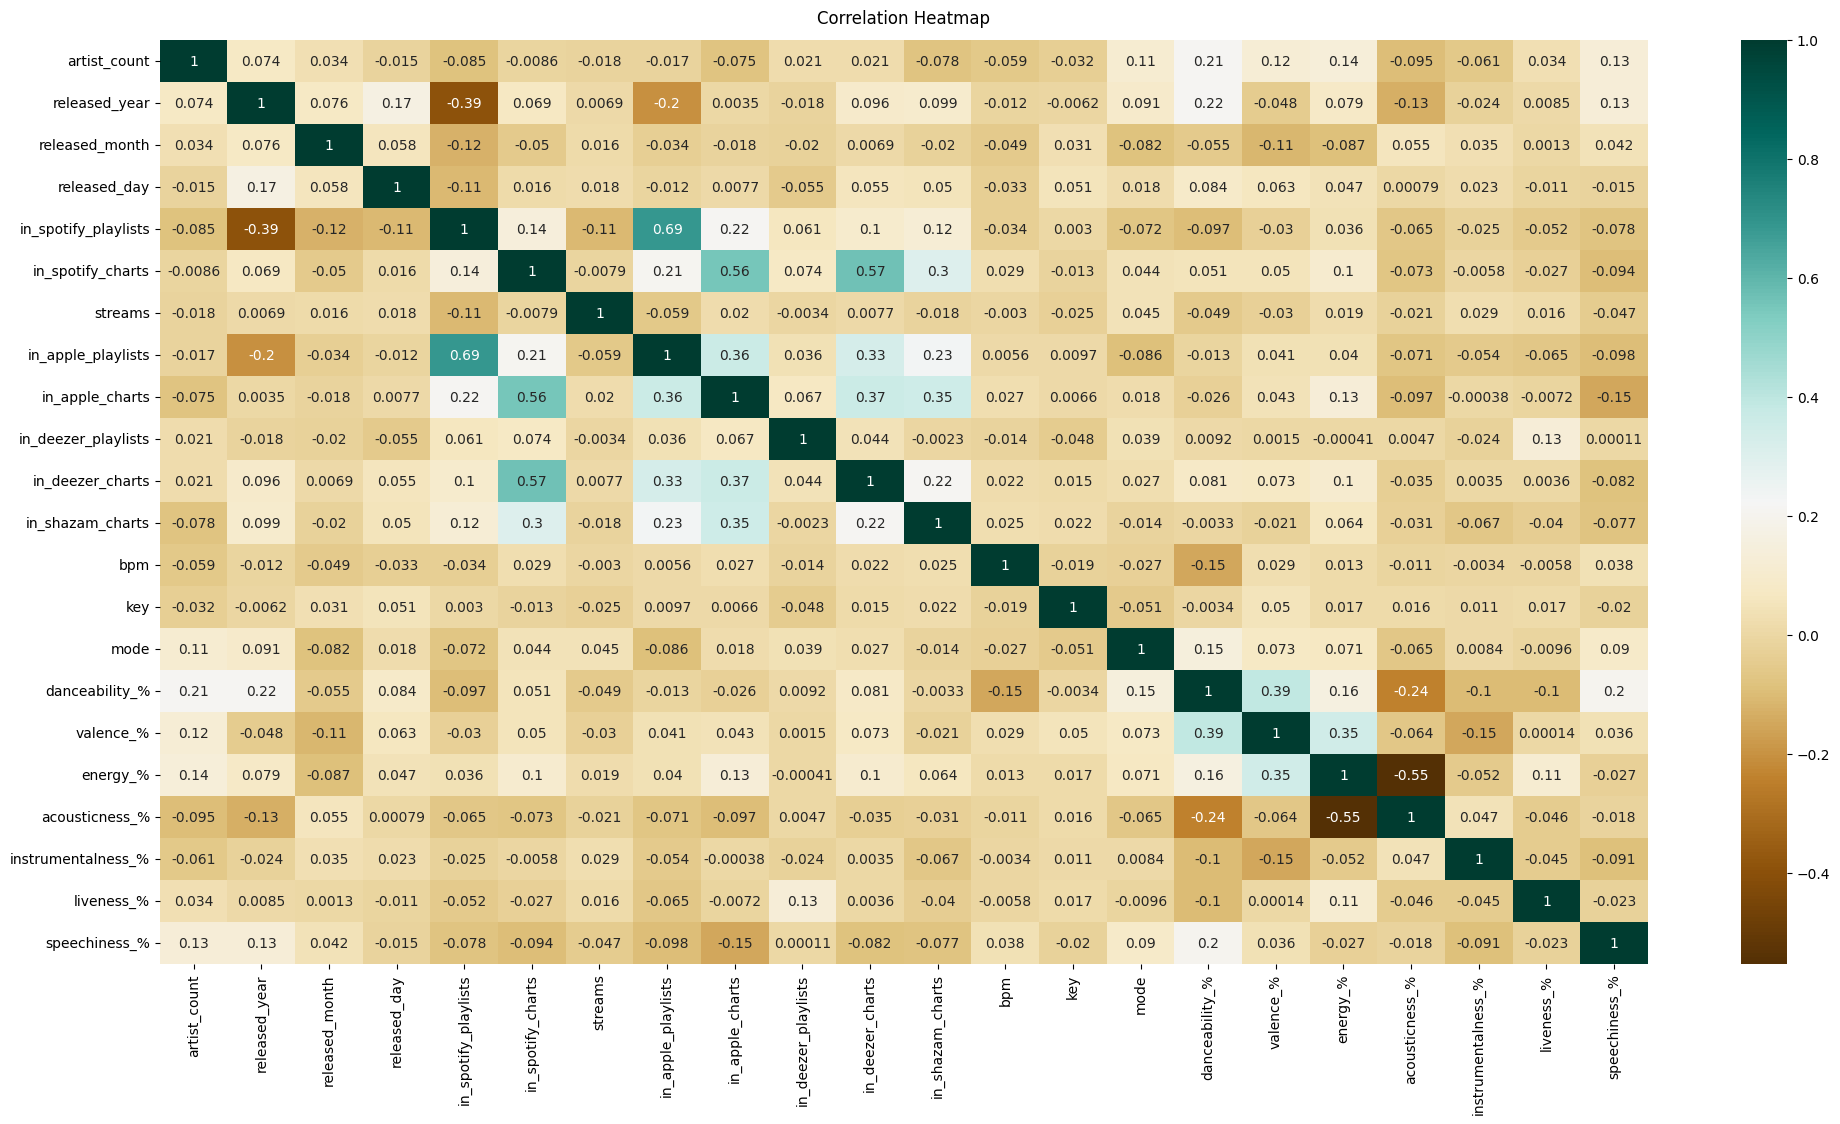

In [12]:
plt.figure(figsize=(24, 12))
heatmap = sns.heatmap(df_le.corr(), cmap='BrBG', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [13]:
print(df_le.keys())

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


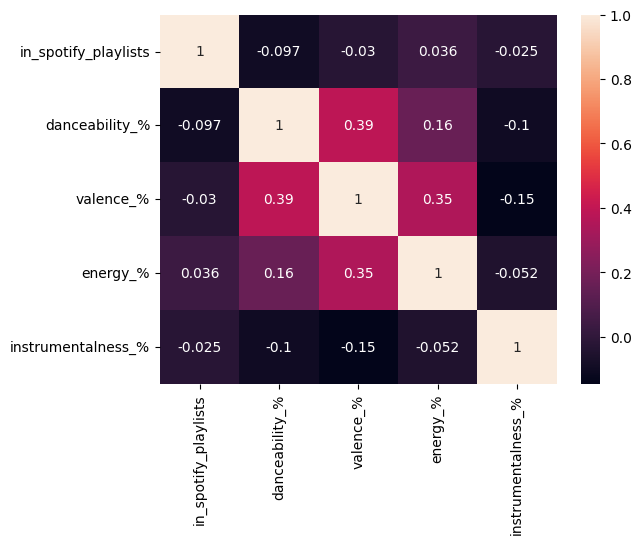

In [14]:
corr_matrix = np.corrcoef([df['in_spotify_playlists'], df['danceability_%'],
                           df['valence_%'],df['energy_%'], df['instrumentalness_%']])

sns.heatmap(corr_matrix, annot = True,
            xticklabels=['in_spotify_playlists', 'danceability_%', 'valence_%',
                         'energy_%', 'instrumentalness_%'],
            yticklabels=['in_spotify_playlists', 'danceability_%', 'valence_%',
                         'energy_%', 'instrumentalness_%'])

plt.show()

        

In [41]:
feature_names = ['in_spotify_charts', 'bpm', 'mode', 'danceability_%']

In [42]:
feature_names

['in_spotify_charts', 'bpm', 'mode', 'danceability_%']

In [43]:
df_boxplots = df_le[['in_spotify_charts', 'bpm', 'mode', 'danceability_%']].copy()

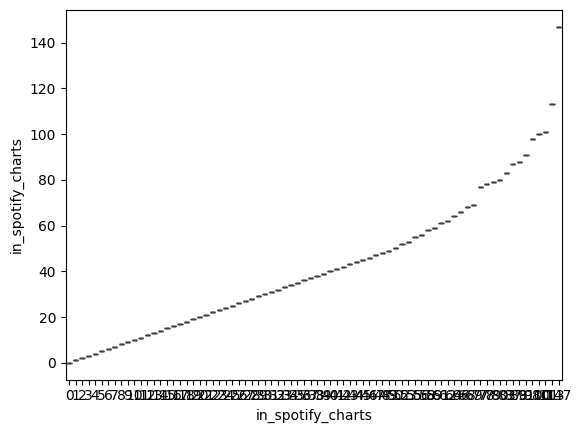

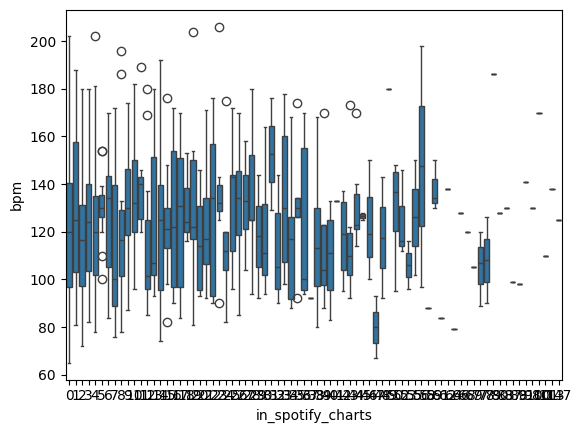

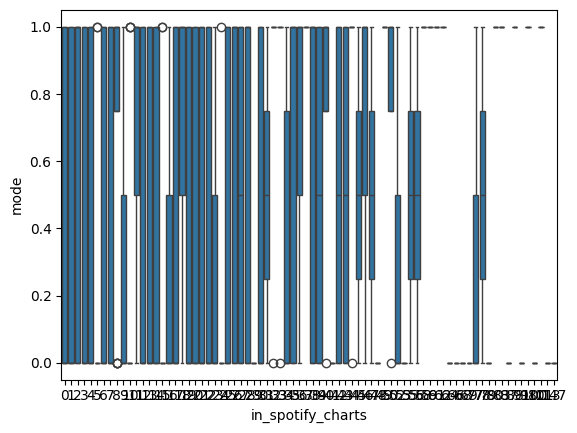

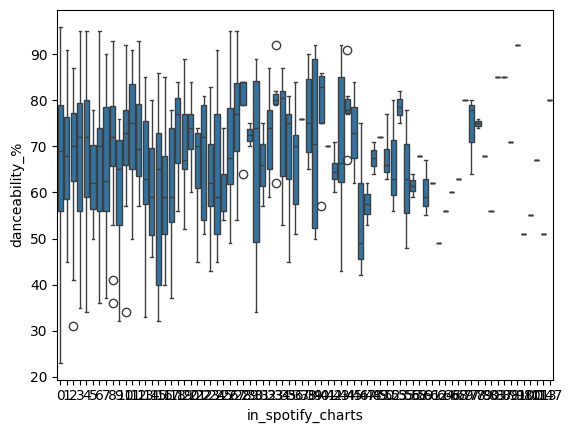

In [44]:
for i in range(len(feature_names)):
    figure = plt.figure()
    ax = sns.boxplot(x = 'in_spotify_charts', y = feature_names[i], data=df_boxplots)

In [45]:
print(df_le.keys())

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


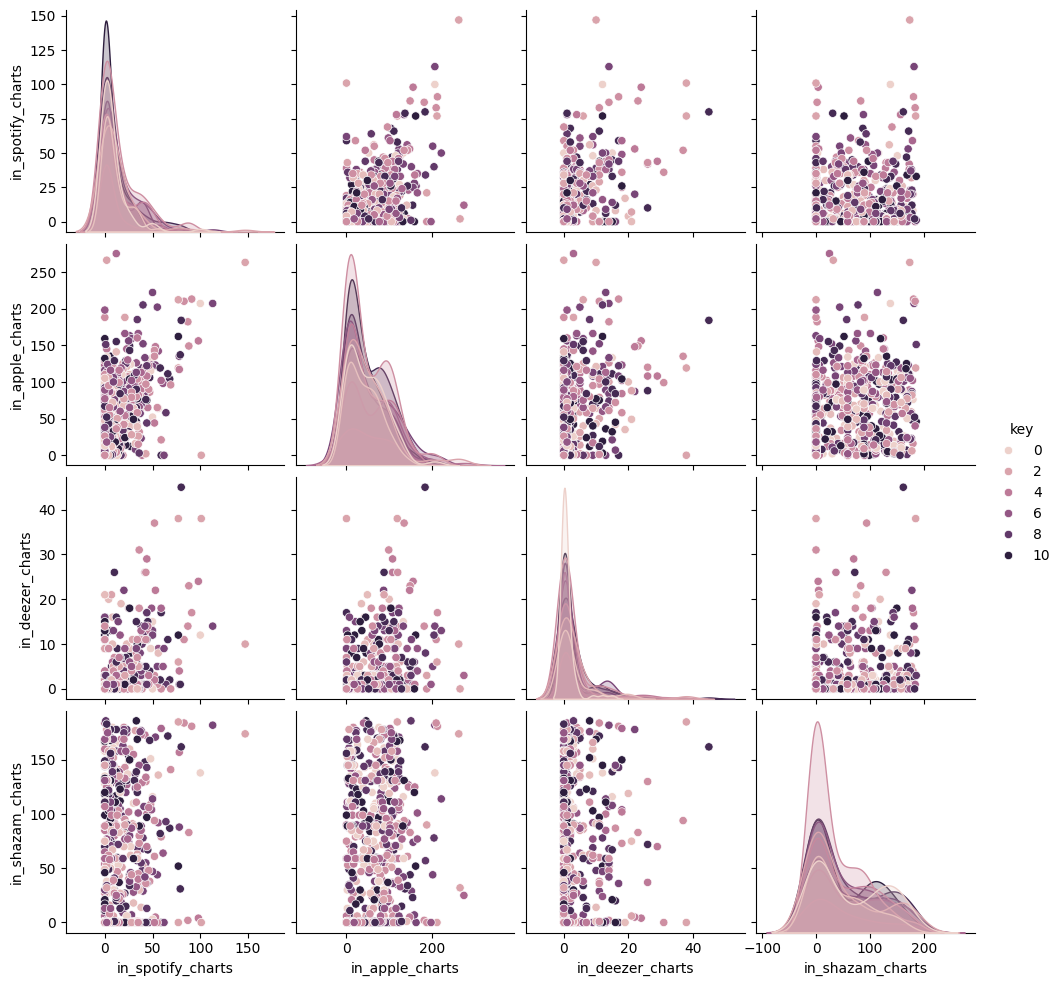

In [46]:
sns.pairplot(df_le, hue = 'key',
             x_vars=['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts',
                         'in_shazam_charts'],
             y_vars=['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts',
                         'in_shazam_charts'])
plt.show()

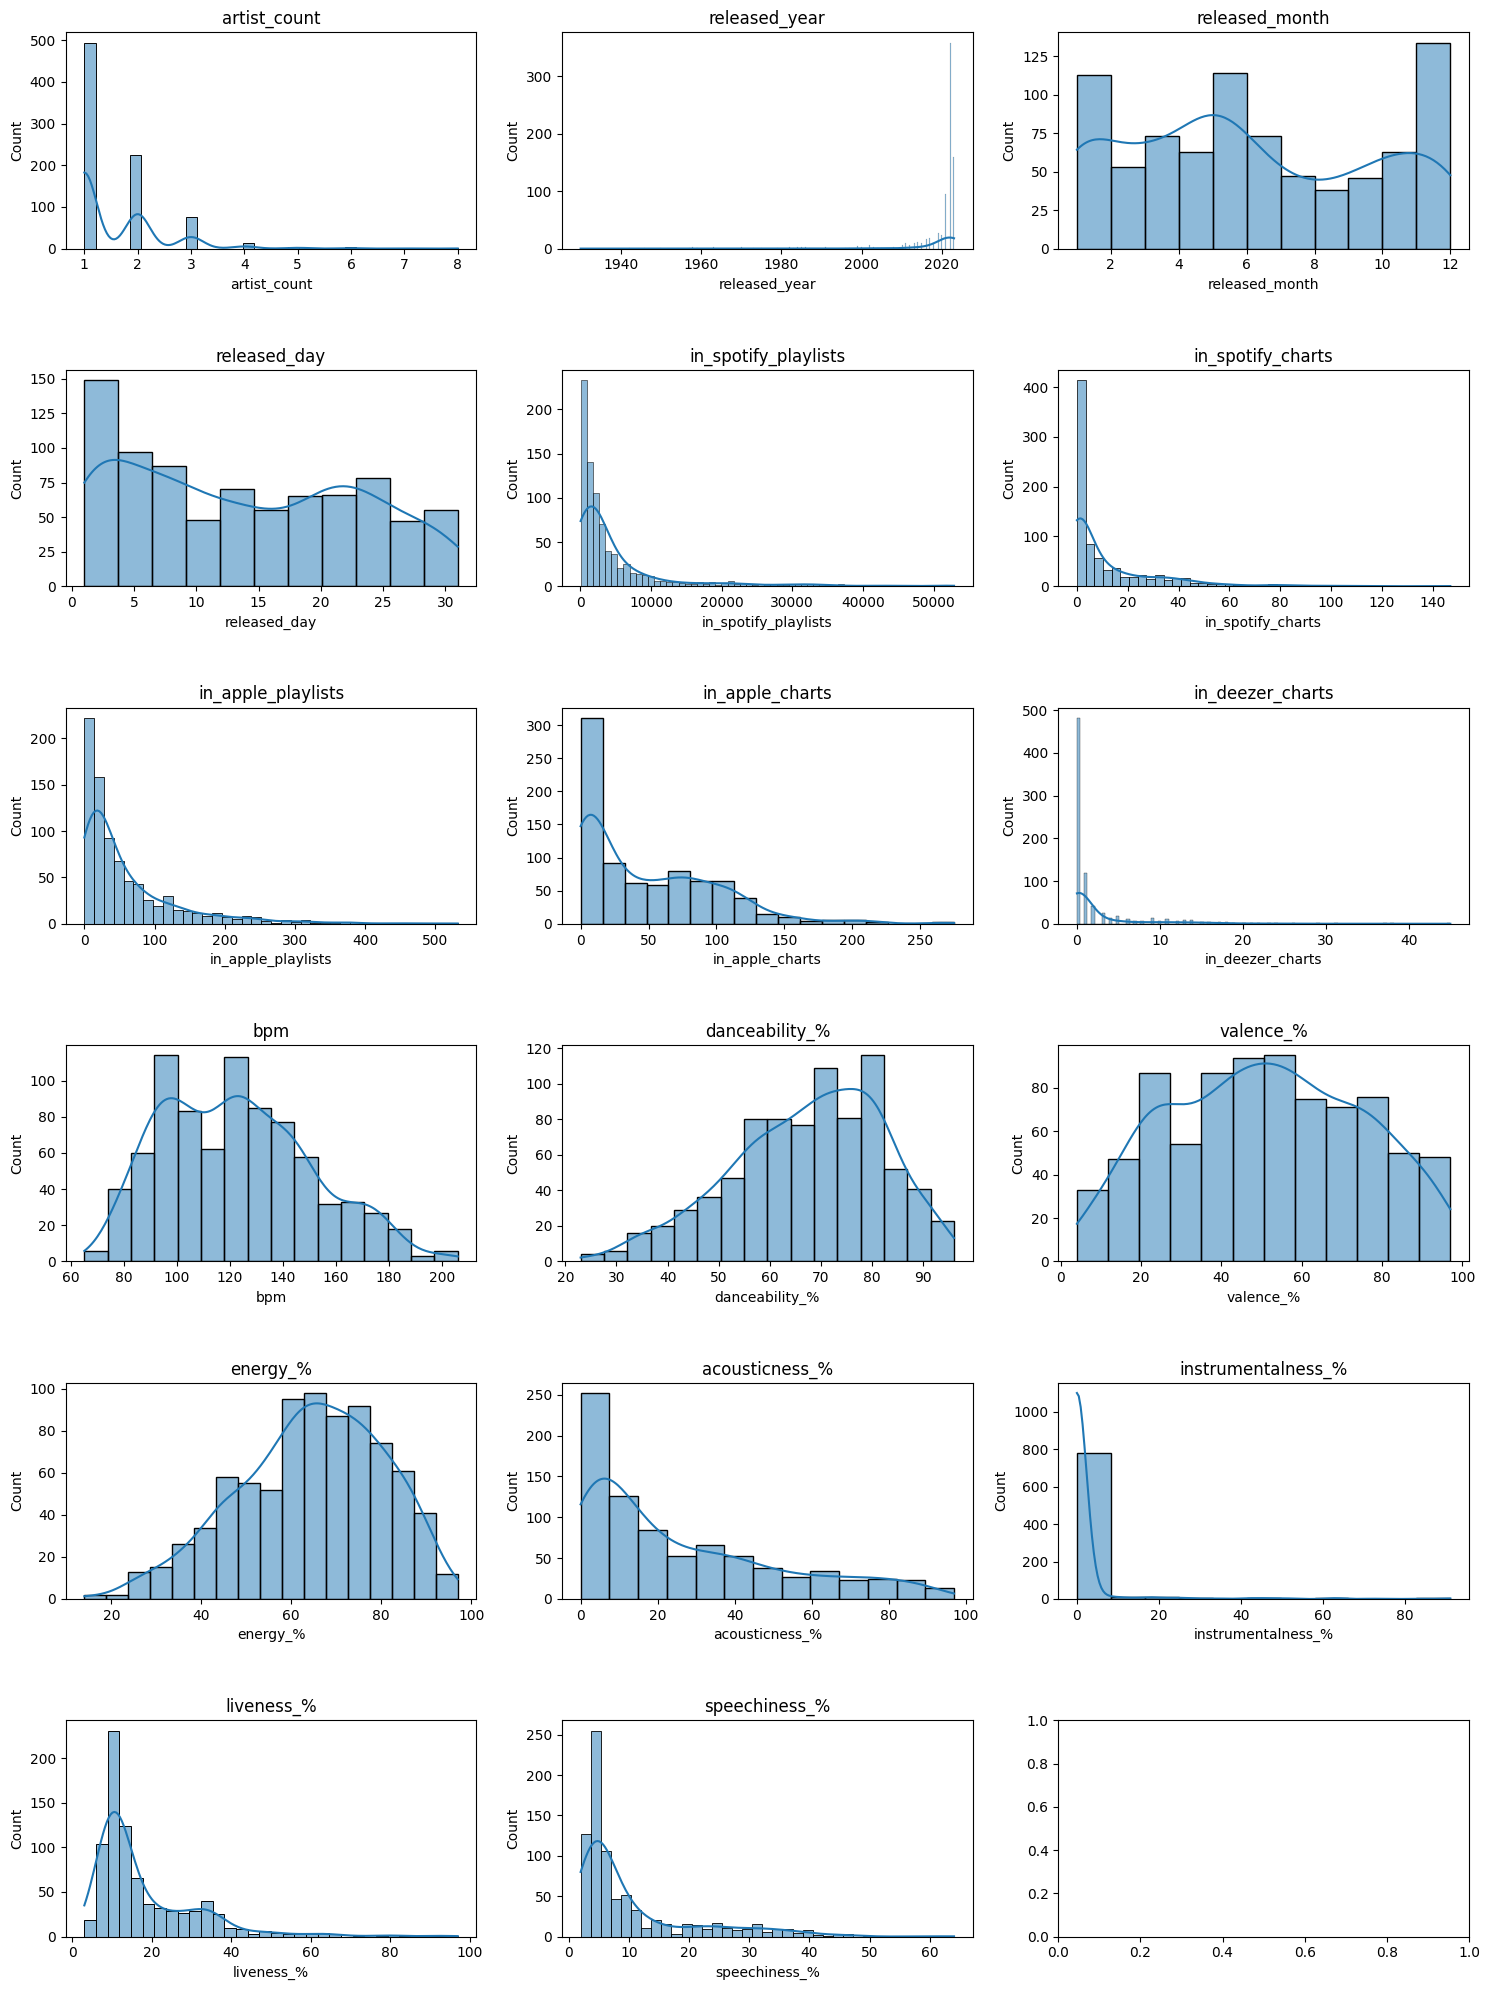

In [47]:
fig, axes = plt.subplots(6, 3, figsize=(15, 20))
ax = axes.flatten()

for i, col in enumerate(df_le.select_dtypes(include=['int64'])):
    sns.histplot(df_le[col], ax=ax[i], kde=True)
    ax[i].set_title(col)
    ax[i].ticklabel_format(style='plain', axis='both')

fig.tight_layout(w_pad=1, h_pad=4)
plt.show()

In [48]:
#decision tree

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [51]:
df_le.shape

(817, 22)

In [52]:
df_le.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,2023,7,14,553,147,127,43,263,192,...,125,2,0,80,89,83,31,0,8,4
1,1,2023,3,23,1474,48,100,48,126,226,...,92,3,0,71,61,74,7,0,10,4
2,1,2023,6,30,1397,113,123,94,207,285,...,138,7,0,51,32,53,17,0,31,6
3,1,2019,8,23,7858,100,738,116,207,40,...,170,0,0,55,58,72,11,0,11,15
4,1,2023,5,18,3133,50,417,84,133,278,...,144,0,1,65,23,80,14,63,11,6


In [62]:
df_cp = df_le.copy()
df_cp.columns

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [63]:
X = df_cp.drop(['key'], axis = 1)
y = df_cp['key']
set(y) ## labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [64]:
print(type(X), type(y))
print(X.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(817, 21) (817,)


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(type(X), type(y))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(653, 21) (653,)


In [66]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.07      0.09      0.08        11
           1       0.00      0.00      0.00        10
           2       0.12      0.12      0.12        17
           3       0.09      0.15      0.12        20
           4       0.07      0.06      0.07        16
           5       0.12      0.20      0.15         5
           6       0.12      0.22      0.16         9
           7       0.19      0.27      0.22        15
           8       0.00      0.00      0.00        18
           9       0.13      0.08      0.10        25
          10       0.17      0.11      0.13        18

    accuracy                           0.11       164
   macro avg       0.10      0.12      0.10       164
weighted avg       0.10      0.11      0.10       164

[[1 0 0 6 1 0 0 1 1 0 1]
 [2 0 2 1 0 0 0 2 3 0 0]
 [1 0 2 4 3 0 2 3 1 1 0]
 [1 0 3 3 2 2 0 2 3 1 3]
 [1 0 0 4 1 1 3 1 1 2 2]
 [0 0 1 0 1 1 2 0 0 0 0]
 [2 1 1 2 0 0 2 1 0 0 0]
 [0 1 1 1 2 

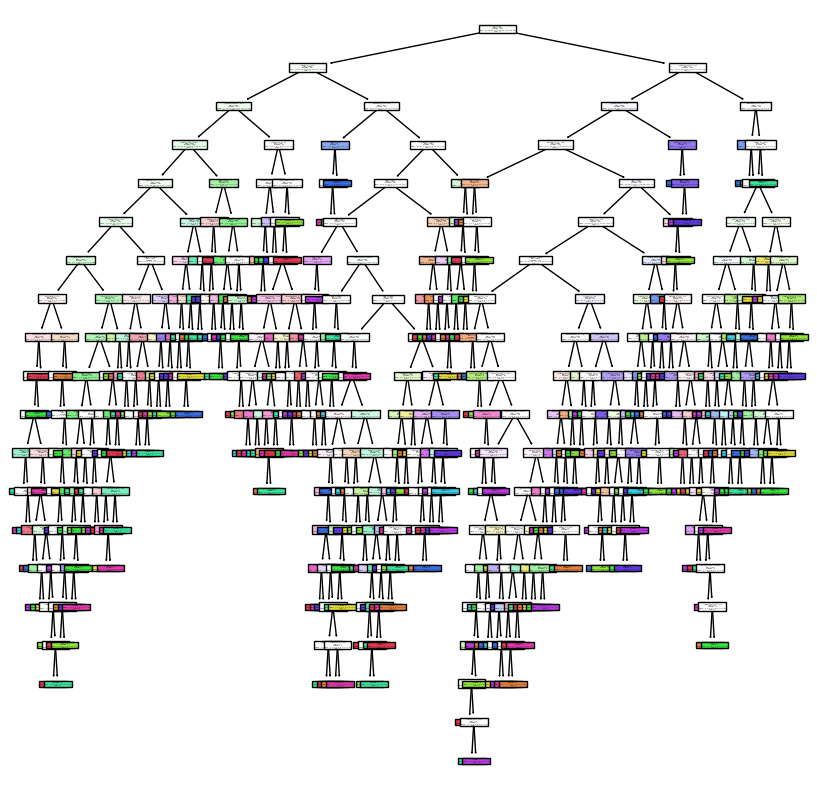

In [70]:
plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = ['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'], 
          class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], filled = True)
plt.show()

In [71]:
#knn

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [73]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          817 non-null    int64
 1   released_year         817 non-null    int64
 2   released_month        817 non-null    int64
 3   released_day          817 non-null    int64
 4   in_spotify_playlists  817 non-null    int64
 5   in_spotify_charts     817 non-null    int64
 6   streams               817 non-null    int32
 7   in_apple_playlists    817 non-null    int64
 8   in_apple_charts       817 non-null    int64
 9   in_deezer_playlists   817 non-null    int32
 10  in_deezer_charts      817 non-null    int64
 11  in_shazam_charts      817 non-null    int32
 12  bpm                   817 non-null    int64
 13  key                   817 non-null    int32
 14  mode                  817 non-null    int32
 15  danceability_%        817 non-null    int64
 16  valence_%    

In [74]:
df_le.isnull().sum()

artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [75]:
X = df_le.drop(['key'], axis = 1)
y = df_le['key']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [76]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [77]:
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [87]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [88]:
pred = knn.predict(scaled_X_test)

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.16      0.33      0.22        15
           1       0.00      0.00      0.00        11
           2       0.05      0.18      0.08        11
           3       0.24      0.28      0.25        29
           4       0.19      0.17      0.18        18
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         8
           7       0.50      0.05      0.09        20
           8       0.00      0.00      0.00        12
           9       0.17      0.05      0.08        19
          10       0.00      0.00      0.00        16

    accuracy                           0.12       164
   macro avg       0.12      0.10      0.08       164
weighted avg       0.16      0.12      0.11       164

[[5 0 3 1 1 2 2 0 0 0 1]
 [2 0 2 5 0 0 1 0 0 0 1]
 [2 0 2 4 0 0 1 1 0 1 0]
 [5 3 7 8 1 0 0 0 1 3 1]
 [2 2 3 4 3 0 3 0 0 1 0]
 [1 0 2 0 0 0 2 0 0 0 0]
 [2 0 1 3 1 0 0 0 0 0 1]
 [5 2 6 2 2 

In [89]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

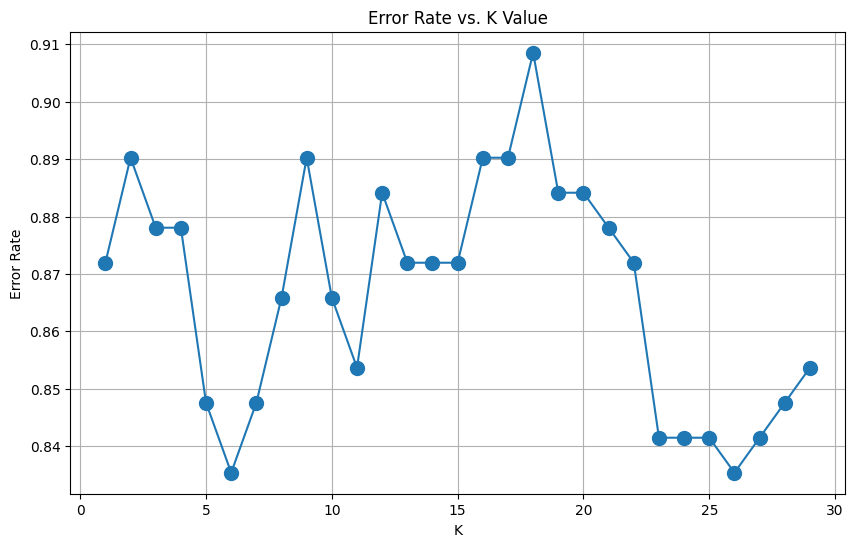

In [90]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [97]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[ 4  0  1  2  4  1  0  2  0  1  0]
 [ 3  0  0  3  0  0  1  1  0  3  0]
 [ 0  0  3  3  1  0  1  2  0  0  1]
 [ 2  1  3 10  3  0  1  4  0  4  1]
 [ 2  0  1  8  3  0  0  2  0  0  2]
 [ 0  0  0  1  1  0  1  2  0  0  0]
 [ 0  1  3  0  1  0  1  1  1  0  0]
 [ 2  1  5  1  2  0  2  2  0  3  2]
 [ 1  0  1  2  3  0  0  0  0  4  1]
 [ 2  0  4  6  4  0  0  0  0  2  1]
 [ 1  1  1  7  2  0  1  0  1  1  1]]

              precision    recall  f1-score   support

           0       0.24      0.27      0.25        15
           1       0.00      0.00      0.00        11
           2       0.14      0.27      0.18        11
           3       0.23      0.34      0.28        29
           4       0.12      0.17      0.14        18
           5       0.00      0.00      0.00         5
           6       0.12      0.12      0.12         8
           7       0.12      0.10      0.11        20
           8       0.00      0.00      0.00        12
           9       0.11      0.11      0.11        19
       

In [98]:
#svm

In [110]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [111]:
set(df_le['key'])
X_train, X_test, y_train, y_test = train_test_split(df_le, df_le['key'], test_size=0.20)

In [112]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [113]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
model.fit(scaled_X_train,y_train)

SVC(gamma=1.0)

In [114]:
y_pred = model.predict(scaled_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        14
           3       0.15      1.00      0.26        25
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        19

    accuracy                           0.15       164
   macro avg       0.01      0.09      0.02       164
weighted avg       0.02      0.15      0.04       164

[[ 0  0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0]
 [ 0  0

C:\Users\Andrii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andrii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andrii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [115]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [116]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [117]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [118]:
model = SVC(C=1000, gamma = 0.001, kernel = 'rbf')
model.fit(scaled_X_train,y_train)

SVC(C=1000, gamma=0.001)

In [119]:
y_pred = model.predict(scaled_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19

    accuracy                           1.00       164
   macro avg       1.00      1.00      1.00       164
weighted avg       1.00      1.00      1.00       164

[[13  0  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0]
 [ 0  0

In [104]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [105]:
y_pred = adaboost.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        16
           3       0.21      1.00      0.34        29
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        18
           8       0.00      0.00      0.00        21
           9       0.00      0.00      0.00        18
          10       1.00      1.00      1.00        10

    accuracy                           0.32       164
   macro avg       0.20      0.27      0.21       164
weighted avg       0.18      0.32      0.21       164

[[14  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0]
 [ 0  0

C:\Users\Andrii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andrii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Andrii\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [106]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [107]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.50      0.20      0.29         5
           2       0.71      0.94      0.81        16
           3       0.96      0.90      0.93        29
           4       0.58      0.88      0.70        16
           5       0.00      0.00      0.00         7
           6       0.62      0.80      0.70        10
           7       0.57      0.67      0.62        18
           8       1.00      0.52      0.69        21
           9       0.90      1.00      0.95        18
          10       1.00      1.00      1.00        10

    accuracy                           0.77       164
   macro avg       0.70      0.71      0.68       164
weighted avg       0.77      0.77      0.76       164

[[12  1  1  0  0  0  0  0  0  0  0]
 [ 1  1  3  0  0  0  0  0  0  0  0]
 [ 0  0 15  1  0  0  0  0  0  0  0]
 [ 1  0  1 26  0  0  1  0  0  0  0]
 [ 0  0  1  0 14  0  0  1  0  0  0]
 [ 0  0